Call Option - MAE: 143.49, RMSE: 197.25, Accuracy: 89.85%
Put Option - MAE: 81.91, RMSE: 151.39, Accuracy: 79.07%


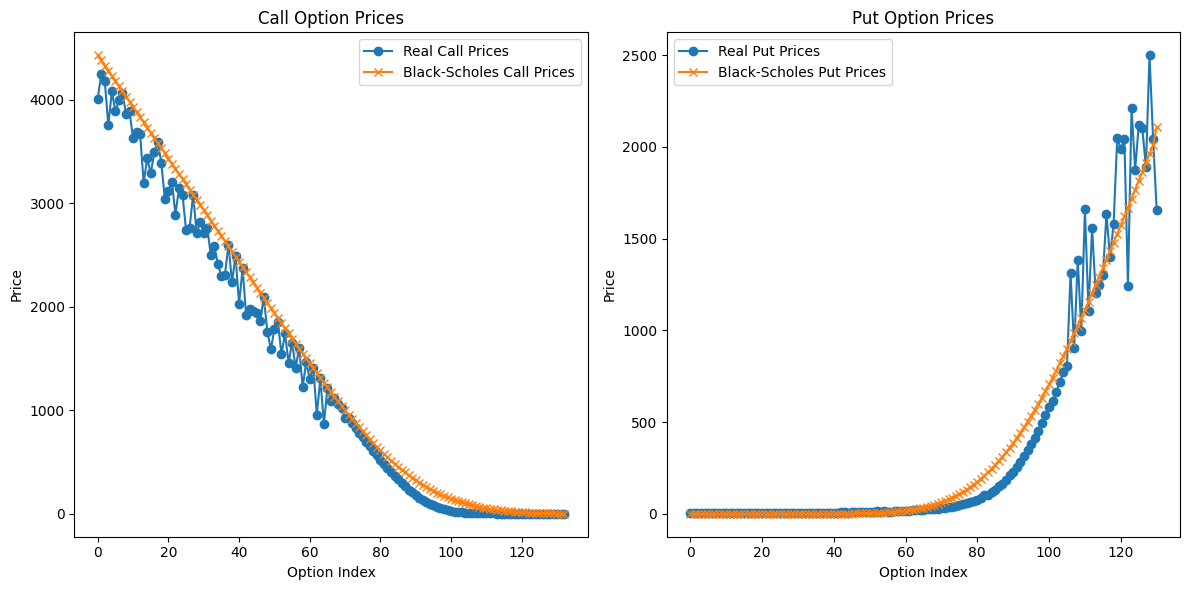

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm

# Function to calculate Black-Scholes option price
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

# Function to calculate accuracy
def calculate_accuracy(real_prices, calculated_prices):
    # Convert lists to NumPy arrays
    real_prices = np.array(real_prices, dtype=float)
    calculated_prices = np.array(calculated_prices, dtype=float)
    
    # Calculate the absolute differences
    differences = np.abs(real_prices - calculated_prices)
    
    # Calculate MAE and RMSE
    mae = np.mean(differences)
    rmse = np.sqrt(np.mean(differences**2))
    
    accuracy_percentage = 100 - (mae / np.mean(real_prices)) * 100
    return mae, rmse, accuracy_percentage

# Load data from CSV
data = pd.read_csv('data.csv')

# Clean data
data['lastPrice'] = pd.to_numeric(data['lastPrice'], errors='coerce')  # Convert non-numeric to NaN
data = data.dropna(subset=['lastPrice'])  # Drop rows where 'lastPrice' is NaN

# Parameters
r = 0.06  # Risk-free rate
sigma = 0.2  # Implied volatility
S = 24542  # Current spot price of Nifty50 index (example)

# Lists to store results
real_call_prices = []
calculated_call_prices = []
real_put_prices = []
calculated_put_prices = []

# Loop through data
for index, row in data.iterrows():
    K = row['strike']
    T = (pd.to_datetime(row['expiry']) - pd.to_datetime(datetime.today())).days / 365
    real_price = row['lastPrice']
    
    if row['optionType'] == 'call':
        real_call_prices.append(real_price)
        calculated_call_prices.append(black_scholes(S, K, T, r, sigma, 'call'))
    elif row['optionType'] == 'put':
        real_put_prices.append(real_price)
        calculated_put_prices.append(black_scholes(S, K, T, r, sigma, 'put'))

# Calculate accuracy
call_mae, call_rmse, call_accuracy = calculate_accuracy(real_call_prices, calculated_call_prices)
put_mae, put_rmse, put_accuracy = calculate_accuracy(real_put_prices, calculated_put_prices)

# Check accuracy
print(f"Call Option - MAE: {call_mae:.2f}, RMSE: {call_rmse:.2f}, Accuracy: {call_accuracy:.2f}%")
print(f"Put Option - MAE: {put_mae:.2f}, RMSE: {put_rmse:.2f}, Accuracy: {put_accuracy:.2f}%")
    
# Plotting the results
plt.figure(figsize=(12, 6))
    
# Plot for Call Options
plt.subplot(1, 2, 1)
plt.plot(real_call_prices, label="Real Call Prices", marker='o')
plt.plot(calculated_call_prices, label="Black-Scholes Call Prices", marker='x')
plt.title("Call Option Prices")
plt.xlabel("Option Index")
plt.ylabel("Price")
plt.legend()
    
# Plot for Put Options
plt.subplot(1, 2, 2)
plt.plot(real_put_prices, label="Real Put Prices", marker='o')
plt.plot(calculated_put_prices, label="Black-Scholes Put Prices", marker='x')
plt.title("Put Option Prices")
plt.xlabel("Option Index")
plt.ylabel("Price")
plt.legend()
    
plt.tight_layout()
plt.show()
